In [65]:
%matplotlib inline
import numpy as np
import random as py_random
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division

# Graph settings
#sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Store off seed
seed = int(time.time())

print seed

# Set seed
np.random.seed(seed)
py_random.seed(seed)


# Resampling method
def resample(data):
    n = len(data)
    return [data[i] for i in [py_random.randint(0, n - 1) for _ in xrange(0, n)]]

1474922568


# Problem Set 1

## Directions

1. Show all work/steps/calculations. If it is easier to write it out by hand, do so and submit a scanned PDF in addition to this notebook. Otherwise, generate a Markdown cell for each answer. You should thus submit 2-3 items:
    1. the .ipynb version of the notebook.
    2. the .html version of the notebook `$ jupyter nbconvert <name of notebook>.ipynb`. This is the copy that will be graded.
    3. (optional) PDF of hand written sections.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
**3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well.** Why are you picking this procedure? Why are you defining the ROPE to be that size?

## Question 1 - Apply Bayes Rule

**Part 1.** There is a genetic condition that affects 2.3% of the population, C = {yes, no}. Tests can detect the condition with 72.1% accuracy (the "true positive rate") but have a false positive rate of 20.3%, T={pos., neg}.
 
For some random member of the population, T=pos, what is the probability P(C=yes| T=pos)? 
 
You can work this out by hand, use code, however you feel most comfortable. Part of the challenge is taking the information I've given you above and assigning it to the right "thing" in Bayes Rule. What is the prior? What is the likelihood?

<b>From the problem statement we are given 72.1% test positive given they have the condition ($P(T=pos|C=yes)$), $P(C=yes)$ is 2.3%, $P(C=no)$ is 97.7%, $P(T=pos|C=no)$ is 20.3%.

In this case, $P(T=pos|C=yes)$ is the likelihood and $P(C=yes)$ is the prior we care about.

Using Bayes Theorem, we get $P(C=yes|T=pos) = (P(T=pos|C=yes) * P(C=yes)) / P(T=pos)$.

We can calculate $P(T=pos)$ using total probability. This means $P(T=pos) = P(T=pos|C=no) * P(C=no) + P(T=pos|C=yes) * P(C=yes) = 0.203 * 0.977 + 0.721 * 0.023 = 0.214914$

Therefore, $P(C=yes|T=pos) = (P(T=pos|C=yes) * P(C=yes)) / P(T=pos) = (0.721 * .023) / 0.214914 = 0.077$</b>

**Part 2.** Assume the true positive rate is 97.3% but the false positive rate is 37.2%. What is
the probability P(C=yes | T= pos) now? 



<b>This changes $P(T=pos|C=yes)$ to 97.3% and $P(T=pos|C=no)$ to 37.2%. 

$P(T=pos)$ no becomes $P(T=pos|C=no)∗P(C=no)+P(T=pos|C=yes)∗P(C=yes)=(0.372*0.977)+(0.973*0.023)=0.385823$. This increase makes sense in that the probability that our test will return positive, whether true or false, has increased.

Therefore, $P(C=yes|T=pos)=(P(T=pos|C=yes)∗P(C=yes))/P(T=pos)=(0.973*0.023)/0.385823=0.058$</b>

## Question 2 - Statistical Inference with the Bayesian Bootstrap

For each of the following questions, use the Bayesian Bootstrap approach to Statistical Inference. Yes, there are fewer than 30 observations and you shouldn't generally do this. Strangely, statistical inference questions never have 30 or more observations. I think Statisticians are lazy (of course, I'm copying their questions so, kettle, pot; pot, kettle).

**Part 1.** During a particular week, 13 babies were born in a maternity unit. Part of the standard procedure is to measure the length of the baby. Given below is a list of the lengths, in centimeters, of the babies born in this particular period.

Baby data: [49.0, 50.0, 45.0, 51.0, 47.0, 49.0, 48.0, 54.0, 53.0, 55.0, 45.0, 50.0, 48.0]
Baby data sample mean: 49.5384615385
Baby data standard deviation: 3.00295712245


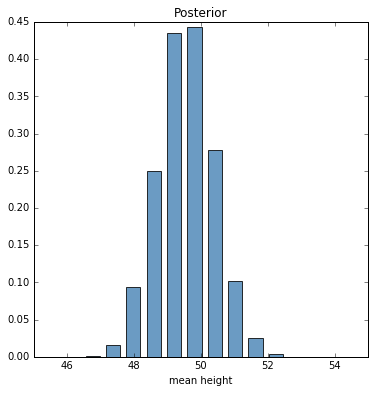

In [66]:
baby_data = [49.0, 50.0, 45.0, 51.0, 47.0, 49.0, 48.0, 54.0, 53.0, 55.0, 45.0, 50.0, 48.0]
print "Baby data:", baby_data
print "Baby data sample mean:", np.mean(baby_data)
print "Baby data standard deviation:", np.std(baby_data)

# Resample observed data 10,000 times to create bootstrap sample
resampled_lengths = np.array([np.mean(sample) for sample in [resample(baby_data) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_lengths, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([45, 55])
axes.set_xlabel("mean height")
axes.set_title("Posterior")

No, that does not say "baby_daddy", it says "baby_data".

Here we want to test the claim that babies are generally about 50 cm in length.

1. Decide on a measure of "about 50cm". Think about what it means to be wrong? For me, thinking in percentages relative to the use case helps, is plus or minus 1% required or plus or minus 10%?
2. What is the 90% "Bayesian Confidence Interval" for the data?
3. What is the probability that the mean of the baby data lies within your "region of practical equivalence" (ROPE)
4. One of the advantages of Bayesian analysis is that we can answer more interesting questions, what is the probability that the average baby length is greater than 50cm?

<b>Answer to question 1: 
1. 10% of 50cm is 5cm giving a range of 45 cm - 55 cm. 1% of 50cm is 0.5 cm giving a range of 49.5 cm - 50.5 cm. As printed above the, standard deviation is 3 cm so I think a range of 49 - 51 cm is a proper definition for "about 50 cm".

<b>Answer to question 2:</b>

In [67]:
print "90% CI", stats.mstats.mquantiles(resampled_lengths, [0.05, 0.95])

90% CI [ 48.15384615  50.92307692]


<b>Answer to question 3:

In [68]:
print "P(49 cm <= sample length <= 51 cm)", np.mean((49 <= resampled_lengths) & (resampled_lengths <= 51))

P(49 cm <= sample length <= 51 cm) 0.7155


<b>Answer to question 4:</b>

In [69]:
print "P(sample length > 50 cm)", np.mean((resampled_lengths > 50))

P(sample length > 50 cm) 0.2779


**Part 2.** A random sample of 30 coffee drinks were each asked to taste-test a new brand of coffee. The responses are listed below with L representing “like”, I representing “indifferent”, and D representing “dislike”:

['L', 'D', 'L', 'L', 'D', 'L', 'L', 'L', 'L', 'I', 'L', 'L', 'L', 'I', 'L', 'D', 'L', 'I', 'L', 'L', 'I', 'L', 'L', 'L', 'D', 'L', 'L', 'L', 'L', 'I']
[1, -1, 1, 1, -1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, -1, 1, 0, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 0]
0.566666666667


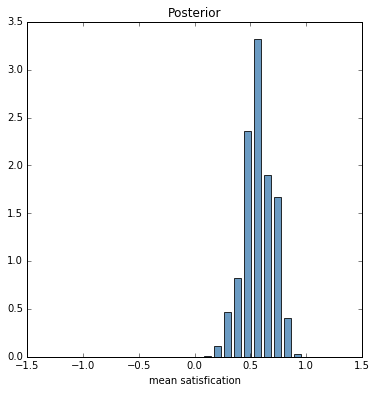

In [70]:
coffee_data = ["L", "D", "L", "L", "D", "L", "L", "L", "L", "I", "L", "L", "L", "I", "L", "D", "L", "I", "L", "L", "I", "L", "L", "L", "D", "L", "L", "L", "L", "I"]
print coffee_data

# Like = 1, indifferent = 0, dislike = -1
# I also tried like = 2, indifferent = 1, and dislike = 0 to see if using a negative number had an effect.
# It didn't appear that was the case, as these new values just shifted the sample to the right.
converted_data = [1 if drinker == "L" else 0 if drinker == "I" else -1 for drinker in coffee_data]
print converted_data
print np.mean(converted_data)

# Resample observed data 10,000 times to create bootstrap sample
resampled_drinkers = np.array([np.mean(sample) for sample in [resample(converted_data) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_drinkers, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([-1.5, 1.5])
axes.set_xlabel("mean satisfication")
axes.set_title("Posterior")

Currently, the data has 3 values of *categorical* variables which is not easy to work with. You may need to transform the data to answer the questions below.

1. What is the 90% "Bayesian Confidence Interval" for the probability of liking the new brand?
2. Decide on a ROPE for the probability of liking the new brand, what is the probability that the data likes within the ROPE?
3. Do these data support the claim that more than half of all coffee drinkers like this new brand of coffee? What is the probability that this claim is true, given the data?

<b>Answer to question 1:</b>

In [71]:
print "90% CI", stats.mstats.mquantiles(resampled_drinkers, [0.05, 0.95])

90% CI [ 0.33333333  0.76666667]


<b>Answer to question 2:</b>

<b>Given the mean and standard deviation for the sample is:</b>

In [72]:
print "Satisfaction sample mean:", np.mean(converted_data)
print "Satisfaction standard deviation:", np.std(converted_data)

Satisfaction sample mean: 0.566666666667
Satisfaction standard deviation: 0.715697018453


<b>I think a 10% range of "liking" is too small (0.99-1.00). I think it is fair given the translated values (1, 0, -1) to use a range of 0.70 - 1.00 for likeability.

The probability of a drinker "liking" the coffee is:</b>

In [73]:
print "P(0.70 <= satisfaction <= 1.00)", np.mean((0.70 <= resampled_drinkers) & (resampled_drinkers <= 1))

P(0.70 <= satisfaction <= 1.00) 0.1897


<b>Answer to question 3:

The worst case for this scenario is a sample where half the coffee drinkers liked the coffee and half don't. In that case, the mean would be zero. Since this is the worst case, we just need to find the probability that $P(0 < satistifaction <= 1)$</b>

In [74]:
print "P(0.00 <= satisfaction <= 1.00)", np.mean((0.00 < resampled_drinkers) & (resampled_drinkers <= 1))

P(0.00 <= satisfaction <= 1.00) 1.0


**Part 3.** A technician was timed on the repair of an electronic instrument on 12 separate occasions. A trainee technician was timed on the repair of the same type of electronic instrument on 14 occasions. The times in minutes are given below:

In [75]:
technician_data = [344.0, 278.0, 267.0, 234.0, 212.0, 271.0, 341.0, 391.0, 176.0, 164.0, 214.0, 399.0]
print technician_data
print np.mean(technician_data)
trainee_data = [279.0, 351.0, 282.0, 280.0, 258.0, 267.0, 312.0, 357.0, 322.0, 249.0, 228.0, 315.0, 311.0, 341.0]
print trainee_data
print np.mean(trainee_data)

[344.0, 278.0, 267.0, 234.0, 212.0, 271.0, 341.0, 391.0, 176.0, 164.0, 214.0, 399.0]
274.25
[279.0, 351.0, 282.0, 280.0, 258.0, 267.0, 312.0, 357.0, 322.0, 249.0, 228.0, 315.0, 311.0, 341.0]
296.571428571


1. What is the 90% Bayesican Confidence Interval for the average technician's time to repair?
2. What is the 90% Bayesian Confidence Interval for the average trainee's time to repair?
3. What is the 90% Bayesian Confidence Interval for the *difference* in average time to repair (tech - trainee)?
4. Think of a a ROPE for the difference, what is the probability that the difference lies in this ROPE?
5. What is the probability that the technician is better than the trainee on average?
6. What is the probability that the trainee is better than the technician on average?

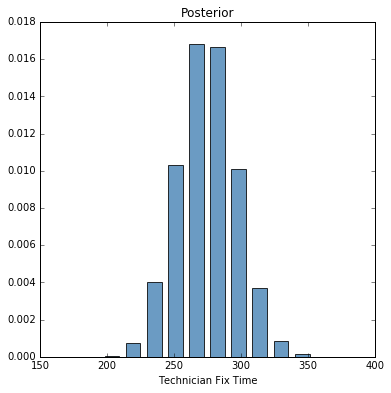

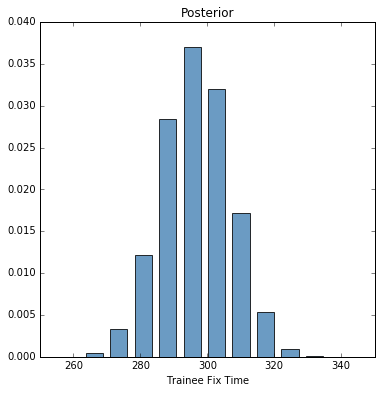

In [76]:
# Resample observed data 10,000 times to create bootstrap sample
resampled_technician = np.array([np.mean(sample) for sample in [resample(technician_data) for i in xrange(0, 10000)]])
resampled_trainee = np.array([np.mean(sample) for sample in [resample(trainee_data) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_technician, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([150, 400])
axes.set_xlabel("Technician Fix Time")
axes.set_title("Posterior")

# Graph resampled data
ys, bins = np.histogram(resampled_trainee, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([250, 350])
axes.set_xlabel("Trainee Fix Time")
axes.set_title("Posterior")

<b>Answer to question 1:</b>

In [77]:
print "90% CI", stats.mstats.mquantiles(resampled_technician, [0.05, 0.95])

90% CI [ 238.91666667  310.5       ]


<b>Answer to question 2:</b>

In [78]:
print "90% CI", stats.mstats.mquantiles(resampled_trainee, [0.05, 0.95])

90% CI [ 280.07142857  313.32785714]


<b>Answer to question 3:</b>

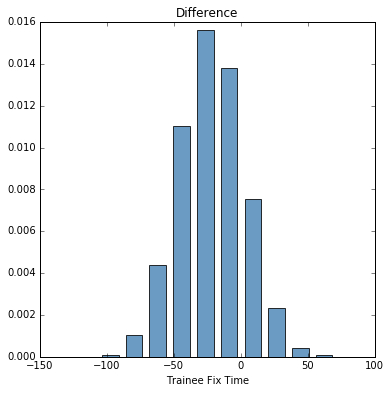

In [79]:
difference = resampled_technician - resampled_trainee

ys, bins = np.histogram(difference, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([-150, 100])
axes.set_xlabel("Trainee Fix Time")
axes.set_title("Difference")

In [80]:
print "90% CI", stats.mstats.mquantiles(difference, [0.05, 0.95])

90% CI [-61.45940476  17.84738095]


<b>Answer to question 4:</b>

Since data reporting is in units of mintues, I think a reasonable ROPE for difference is plus/minus 15 minutes.

In [81]:
print "P(-15 <= difference <= 15 )", np.mean((difference > -15) & (difference < 15))

P(-15 <= difference <= 15 ) 0.321


<b>Answer to question 5:</b><br>
The technician is better than the trainee when the difference is not positive.

In [82]:
print "P(difference < 0)", np.mean(difference < 0)

P(difference < 0) 0.8151


<b>Answer to question 6:</b><br>
The trainee is better than the technician when the difference is positive.

In [83]:
print "P(difference > 0)", np.mean(difference > 0)

P(difference > 0) 0.1844
